In [22]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('../dataset/fer2013.csv','r') as file:
    contents = file.readlines()
    
lines = np.array(contents)

no_of_instances = lines.size
print("no. of instances: ", no_of_instances)

no. of instances:  35888


In [3]:
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

instance length:  2304


In [4]:
X_train, y_train, X_test, y_test = [], [], [], []

for i in range(1, no_of_instances): # starting from 2nd line bcz 1st line is header
    emotion, pixels, usage = lines[i].split(",")
    
    val = pixels.split(" ")
    img_px = np.array(val, 'float32')
    
    emotion = keras.utils.to_categorical(emotion, 7) 
    """
    this above step is crucial, even though the emotion column already had categorical values,
    a mismatch of dimension in output layer occurs if I don't explicitly convert them to categorical.
    Or may be earlier the values were as string. Need to find out!
    For now changing emotion to categorical values works.
    """
    
    if 'Training' in usage:
        X_train.append(img_px)
        y_train.append(emotion)
    elif 'PublicTest' in usage:
        X_test.append(img_px)
        y_test.append(emotion)

In [5]:
#data transformation for train and test sets
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test, 'float32')
y_test = np.array(y_test, 'float32')

X_train /= 255 #normalize inputs between [0, 1]
X_test /= 255

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [6]:
#initializing the CNN
classifier = Sequential()

#1st convolution layer
classifier.add(Conv2D(64,(5,5), activation='relu', input_shape=(48,48,1)))
classifier.add(MaxPooling2D(pool_size=(5,5), strides=(2,2)))

#2nd convolution layer
classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

#3rd convolution layer
classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

#Flattening
classifier.add(Flatten())

#Full connection
classifier.add(Dense(units=1024, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1024, activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=7, activation='softmax'))


In [7]:
train_datagen = ImageDataGenerator()

# test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow(X_train, y_train, batch_size=256)
# testing_set = test_datagen.flow(X_test, y_test, batch_size=256)

#Compile the CNN
classifier.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

classifier.fit_generator(
    training_set,
    steps_per_epoch=256,
    epochs=10
)

Epoch 1/10
256/256 [==============================] - 148s 577ms/step - loss: 1.7948 - acc: 0.2547
Epoch 2/10
256/256 [==============================] - 115s 451ms/step - loss: 1.5912 - acc: 0.3680
Epoch 3/10
256/256 [==============================] - 129s 502ms/step - loss: 1.4083 - acc: 0.4546
Epoch 4/10
256/256 [==============================] - 138s 539ms/step - loss: 1.2816 - acc: 0.5109
Epoch 5/10
256/256 [==============================] - 191s 746ms/step - loss: 1.2014 - acc: 0.5421
Epoch 6/10
256/256 [==============================] - 137s 536ms/step - loss: 1.1344 - acc: 0.5719
Epoch 7/10
256/256 [==============================] - 175s 683ms/step - loss: 1.0836 - acc: 0.5899
Epoch 8/10
256/256 [==============================] - 144s 564ms/step - loss: 1.0203 - acc: 0.6156
Epoch 9/10
256/256 [==============================] - 153s 599ms/step - loss: 0.9671 - acc: 0.6361
Epoch 10/10
256/256 [==============================] - 142s 557ms/step - loss: 0.9180 - acc: 0.6556


In [8]:
train_score = classifier.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.8358180029559416
Train accuracy: 69.11769828297608
Test loss: 1.2238487996374807
Test accuracy: 56.2552242972918


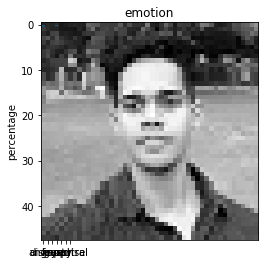

In [24]:
#testing on custom images
img = image.load_img("D:\My_Work\PyCharm\Facial-Expression-Recognition\dataset\images\example4.png", grayscale=True, target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = classifier.predict(x)

emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()


def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()